투자자들은 보조 지표 이용 패턴 : 일목균형표 > 볼린저 밴드 > 매물대 > 상대강도지수 > 이동평균 수렴확산


## 볼린저 밴드
주가의 20일 이동 평균선을 기준으로, 상대정인 고점을 나타내는 상단 밴드와 상대적인 저점을 나타내는 하단 밴드로 구성

주가가 상단 밴드 근처에 있을수록 상대적 고점, 주가가 하단 밴드 근처에 있을수록 상대적 저점에 있다고 판단

상단 밴드와 하단 밴드 사이의 폭은 주가의 표준편차와 특정 상수의 곱ㄱ으로 나타낼 수 있으며, 밴드폭이 좁을 수록 주가 변동성이 작고, 밴드폭이 넓을수록 변동성이 큼


end_date is initialized to '2021-09-04'


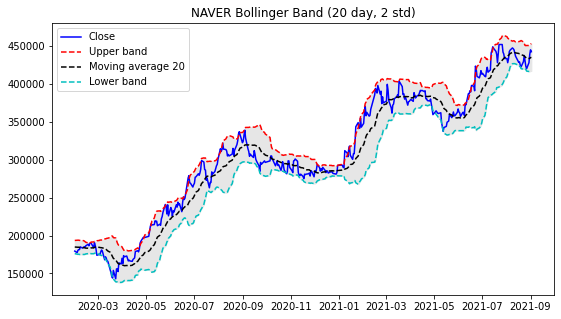

In [2]:
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2020-01-02') # 네이버 기준
  
df['MA20'] = df['close'].rolling(window=20).mean()  # 20개 종가를 이용하여 평균을 구함
df['stddev'] = df['close'].rolling(window=20).std() # 20개 종가를 이용하여 표준편차를 구함
df['upper'] = df['MA20'] + (df['stddev'] * 2)   # 중간 볼린저 밴드 + (2 * 표준편차)
df['lower'] = df['MA20'] - (df['stddev'] * 2)   # 중간 볼린저 밴드 - (2 * 표준편차)
df = df[19:]  # 19번째 행까지는 NaN이 나오기 때문에 20번째 행부터 사용

plt.figure(figsize=(9, 5))
plt.plot(df.index, df['close'], color='#0000ff', label='Close') # 종가 파랑
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band') # 상단 볼린저 밴드 빨강
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20') # 20일 평균 검정
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band') # 하단 볼린저 밴드 초록
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')  # 상단 밴드와 하단 밴드 사이를 회색으로 표기
plt.legend(loc='best')
plt.title('NAVER Bollinger Band (20 day, 2 std)')
plt.show()


## 볼린저 밴드 지표 : %b
%b = 주가가 볼린저 밴드 어디에 위치하는지를 나타내는 지표

%b 값이 상단 밴드에 걸쳐져 있으면 1.0, 중간 0.5, 하단 밴드에 걸쳐져 있으면 0이다.

%b는 상한선이나 하한선이 없으므로 종가가 상단 밴드보다 높으면 1.0을 넘는다.

ex) %b = 1.1 -> 주가가 상단 밴드보다 밴드폭의 10% 위에 있음

end_date is initialized to '2021-09-04'


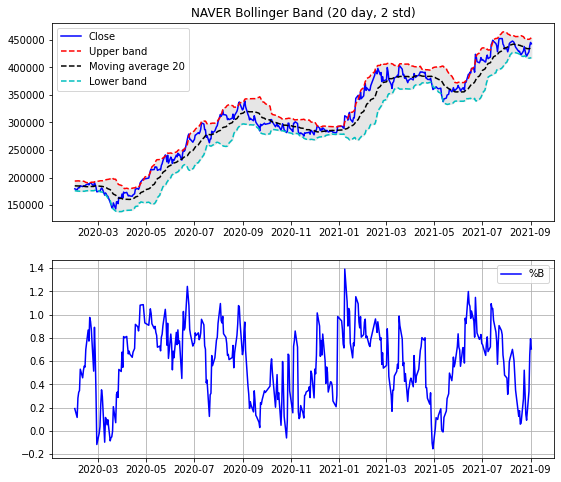

In [3]:
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2020-01-02') # 네이버 기준
  
df['MA20'] = df['close'].rolling(window=20).mean()  # 20개 종가를 이용하여 평균을 구함
df['stddev'] = df['close'].rolling(window=20).std() # 20개 종가를 이용하여 표준편차를 구함
df['upper'] = df['MA20'] + (df['stddev'] * 2)   # 중간 볼린저 밴드 + (2 * 표준편차)
df['lower'] = df['MA20'] - (df['stddev'] * 2)   # 중간 볼린저 밴드 - (2 * 표준편차)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower']) # %b 칼럼 생성
df = df[19:]  # 19번째 행까지는 NaN이 나오기 때문에 20번째 행부터 사용

plt.figure(figsize=(9, 8))
plt.subplot(2,1,1) # 기존 볼린저 밴드 차트
plt.plot(df.index, df['close'], color='#0000ff', label='Close') # 종가 파랑
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band') # 상단 볼린저 밴드 빨강
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20') # 20일 평균 검정
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band') # 하단 볼린저 밴드 초록
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')  # 상단 밴드와 하단 밴드 사이를 회색으로 표기
plt.title('NAVER Bollinger Band (20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2,1,2) # %b 차트
plt.plot(df.index, df['PB'], color='b', label='%B')
plt.grid(True)
plt.legend(loc='best')
plt.show()


## 볼린저 밴드 지표 : 밴드폭
밴드폭 = 상단 볼린저 밴드와 하단 볼린저 밴드 사이의 폭을 의미 

| 스퀴즈를 확인하는데 유용한 지표

스퀴즈 = 변동성이 극히 낮은 수준까지 떨어져 곧이어 변동성 증가가 발생할 것으로 예상되는 상황

밴드폭이 6개월 저점을 기록하는 것을 보고 스퀴즈를 파악 가능



| 추세의 시작과 마지막을 파악할때 사용

강력한 추세는 변동성이 커지면서 밴드폭 수치가 급격히 높아짐 -> 강항 상승 추세는 하단 볼린저 밴드가 아래로 향하는 모습

이후 밴드폰 수치의 변도이 없거나 줄어들면서 볼린저 밴드 추세 반대쪽으로 방향을 바꾸면 추세가 끝난 것

-> but 밴드 태그(주가가 밴드에 닿는 현상)가 일어났다고 해서 무조건 매수/매도의 신호는 아님


end_date is initialized to '2021-09-04'


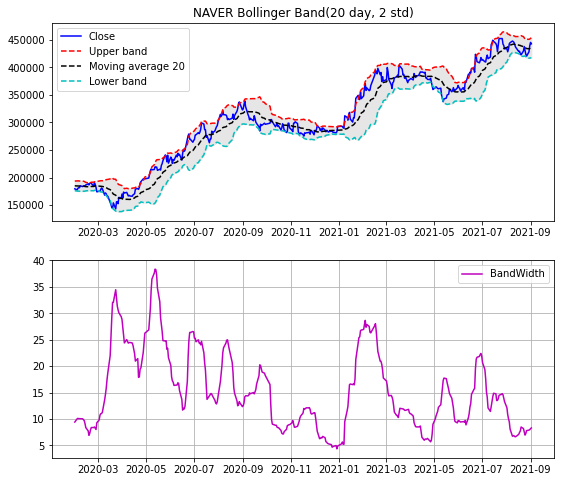

In [5]:
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2020-01-02')
df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100 # 밴드폭 칼럼 생성
df = df[19:]

plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.plot(df.index, df['bandwidth'], color='m', label='BandWidth') # bandwidth 값 표기 마젠타
plt.grid(True)
plt.legend(loc='best')
plt.show()


## 볼린저 밴드 매매 기법
변동성과 추세는 볼린저 밴드 구축 시 사용하였기 때문에, 확증에 활용할 다른 지표들을 범주에서 하나씩 선택해야 함

------------

범주 - 기술적 지표

모멘텀 - 변화율, 스토캣스틱

추세 - 선형회귀, MACD

거래량 - 일중강도, 매집/분산, 현금흐름지표, 거래량가중 MACD

과매수/과매도 - CCI, RSI

심리 - 여론조사선, 풋-콜 비율


-----------------

변동성 돌파, 추세 추종, 반전 중 자신에게 맞는 기법을 찾아 사용할 것을 권장

변동성 돌파 - 주가가 상단 밴드를상향 돌파할 때 매수하고 주가가 하단 밴드를 하향 이탈할 때 공매도

(일반인은 공매도를 하기 어렵기 때문에 비추천)

## 추세 추종 매매 기법
추세 추종 - 상승 추세에 매수하고 하락 추세에 매도하는 기법

현금 흐름지표(MFI), 일중강도 등의 거래량 관련 지표와 함께 이용하여 확증이 이루어진 경우에 매수/매도

- 매수 : 주가가 상단 밴드에 접근하며, 지표가 강세를 확증할 때만 매수 (ex. %b가 0.8보다 크고, MFI가 80보다 클 때)

- 매도 : 주가가 하단 밴드에 접근하며, 지표가 약세를 확증할 때만 매도 (ex. %b가 0.2보다 작고, MFI가 20보다 작을 때)

### MFI (현금흐름지표)
중심 가격 = 일정 기간의 고가, 저가, 종가를 합하여 3으로 나눈 값

현금 흐름 = 중심 가격 * 거래량

MFI는 가격과 거래량을 동시에 분석하므로 상대적으로 신뢰도가 더 높다고 볼 수 있음




end_date is initialized to '2021-09-04'


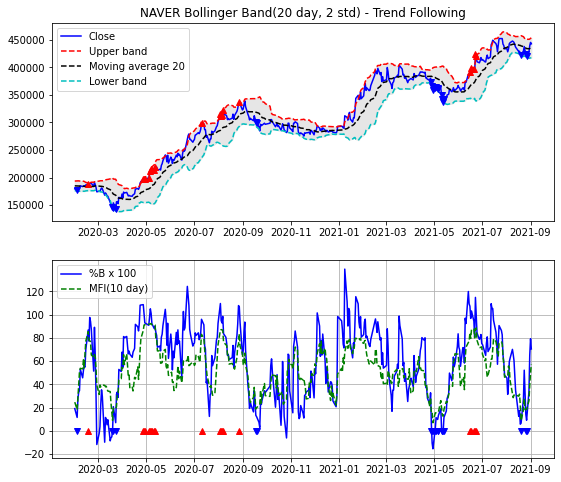

In [2]:
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2020-01-02')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])
df['TP'] = (df['high'] + df['low'] + df['close']) / 3 # 저가, 고가, 종가 합을 3으로 나눠 중심 가격을 구한다. (TP)
df['PMF'] = 0
df['NMF'] = 0
for i in range(len(df.close)-1): # 전체 개수보다 하나 적게 반복
    if df.TP.values[i] < df.TP.values[i+1]: # i번 째 중심 가격보다 i+1번 째가 중심 가격이 높은 경우
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1] # i+1번 째 중심 가격과 i+1번 째 거래량의 곱을 i+1번 째 긍정적 현금 흐름(PMF)에 저장
        df.NMF.values[i+1] = 0 # i+1 번째 부정적 현금 흐름(NMF)을 0으로 저장한다.
    else: # i > i+1
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0 
df['MFR'] = (df.PMF.rolling(window=10).sum() /
    df.NMF.rolling(window=10).sum()) # 10일 간 PMF의 합 / 10일 간 NMF의 합
df['MFI10'] = 100 - 100 / (1 + df['MFR']) # 10일 기준으로 현금흐름지수를 계산한 결과
df = df[19:]

plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
plt.title('NAVER Bollinger Band(20 day, 2 std) - Trend Following')
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:       # %b > 0.8 && MFI10 > 80 
        plt.plot(df.index.values[i], df.close.values[i], 'r^')  # 매수 표시 빨강 상삼각
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:     # %b < 0.2 && MFI10 < 20
        plt.plot(df.index.values[i], df.close.values[i], 'bv')  # 매도 표시 파랑 하삼각
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.plot(df.index, df['PB'] * 100, 'b', label='%B x 100') # MFI와 비교를 위해 100을 곱함
plt.plot(df.index, df['MFI10'], 'g--', label='MFI(10 day)') # MFI10
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120]) # 눈금 단위
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show();   


## 볼린저 밴드 반전 매매 기법
주가가 반전하는 지점을 찾아내 매수 또는 매도하는 기법

-> 주가가 상단 밴드를 여러 차례 태그하는 과정에서 강세 지표가 발생하면 매수, 주가가 상단 밴드를 여러 차례 태그하는 과정에서 약세 지표가 발생하면 매도

기술적 지표는 일중 강도율과 매집 분산율 등을 사용하지만 책에서는 일중 강도율(II%) 하나만 사용


- 매수 : 주가가 하단 밴드 부근에서 W형 패턴, 강세 지표가 확증할 때 매수(%b < 0.05, II% > 0)
- 매도 : 상단 밴드 부근에서 일련은 주가 태그가 일어나며, 약세 지표가 확증할 때 매도(%b > 0.95, II% < 0)

### 일중 강도 (intraday intensity)
21일간 II의 합을 21일 간 거래량 합으로 나누어 표준화한 것

종가가 거래 범위 천정권에서 형성되면 1,

중간에서 형성되면 0,

바닥권에서 형성되면 -1




end_date is initialized to '2021-09-04'


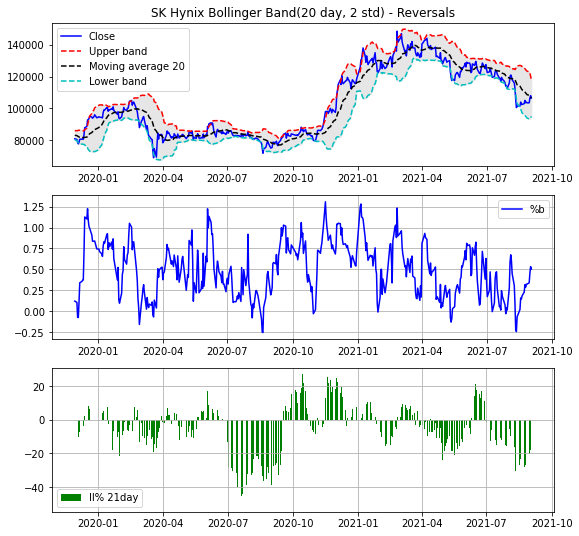

In [3]:
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('SK하이닉스', '2019-11-01')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])

df['II'] = (2*df['close']-df['high']-df['low']) / (df['high']-df['low'])*df['volume']  # 종가, 고가, 저가, 거래량을 통해 일중 강도(II)를 계산
df['IIP21'] = df['II'].rolling(window=21).sum() / df['volume'].rolling(window=21).sum()*100  # 일중강도율 (II%) = 21일간 일중 강도 합 / 21일간 거래량 합
df = df.dropna()

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1) # 볼린저 밴드
plt.title('SK Hynix Bollinger Band(20 day, 2 std) - Reversals')
plt.plot(df.index, df['close'], 'b', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')

plt.legend(loc='best')
plt.subplot(3, 1, 2) # 볼린저 밴드 %b
plt.plot(df.index, df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3)  # 일중 강도율 II%
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')  # 일중 강도율 표기
plt.grid(True)
plt.legend(loc='best')
plt.show()

### 반전 매매 구현

end_date is initialized to '2021-09-04'


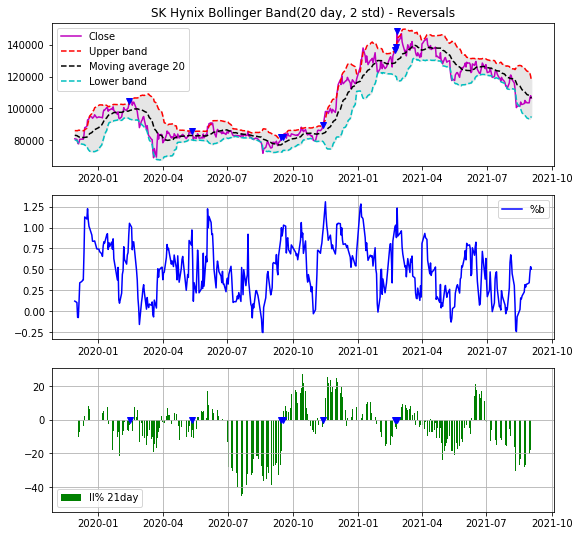

In [4]:
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('SK하이닉스', '2019-11-01')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])

df['II'] = (2*df['close']-df['high']-df['low'])/(df['high']-df['low'])*df['volume']
df['IIP21'] = df['II'].rolling(window=21).sum()/df['volume'].rolling(window=21).sum()*100
df = df.dropna()

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1) # 볼린저 밴드 그래프
plt.title('SK Hynix Bollinger Band(20 day, 2 std) - Reversals')
plt.plot(df.index, df['close'], 'm', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(0, len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:       # %b < 0.05 && II% > 0
        plt.plot(df.index.values[i], df.close.values[i], 'r^')  # 매수 시점 빨강 상삼각
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:     # %b > 0.95 && II% < 0
        plt.plot(df.index.values[i], df.close.values[i], 'bv')  # 매도 시점 파랑 하삼각
plt.legend(loc='best')

plt.subplot(3, 1, 2) # %b 그래프
plt.plot(df.index, df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3) # II% 그래프
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')
for i in range(0, len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, 'r^') # 매수 시점 표기
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], 0, 'bv') # 매도 시점 표기
plt.grid(True)
plt.legend(loc='best')
plt.show()

           
